In [34]:
import numpy as np
import matplotlib.pyplot as plt
import yastn
import yastn.tn.mps as mps
from routines_new import Hamiltonian_dpt_4U_position, Hamiltonian_dpt_4U_momentum, Hamiltonian_dpt_4U_mixed, local_operators


In [ ]:
NW = 4
D = 64
U = 3.05
vS = 0.125
alpha = 0.7
H0, s2i, i2s = Hamiltonian_dpt_4U_position(NW, 0, 0, [0, 10000], 0, U * (2 * alpha - 1))
qI, qc, qcp, qn, dx, dn1, dn2, dI, m12, m21 = local_operators(sym='U1')
psi = mps.random_mps(H0, n=NW+2)
opts_svd = {"D_total": D}
info = mps.dmrg_(psi, H0, method='2site', opts_svd=opts_svd, max_sweeps=100, Schmidt_tol=1e-10)
print(info)

sd = s2i['D1']
O = (np.sqrt(alpha) * dn1 + np.sqrt(1 - alpha) * m12)
O = mps.product_mpo(sd * [qI] + [O] + (len(H0) - 1 - sd) * [qI])
psi = O @ psi
psi.canonize_(to='last')
psi.canonize_(to='first')

print(mps.measure_1site(psi, dn1, psi, sites=0))
print(mps.measure_1site(psi, dn2, psi, sites=0))
oo = mps.measure_1site(psi, qn, psi, sites=list(range(1, len(H0) + 1)))


DMRG_out(sweeps=100, method='2site', energy=-12.476363371874971, denergy=5.684341886080802e-14, max_dSchmidt=5.720731768254948e-09, max_discarded_weight=0.0015045481015475677)
0.7000000000000003
0.30000000000000016


In [42]:
H1, s2i, i2s = Hamiltonian_dpt_4U_position(NW, 0, 0, [0, 0], 0, U)
dt = 0.125
times = np.linspace(0, 8, 33)
traces = {'n1': [], 'n2': [], 'm12': [], 'S1': [], 'S2': [], 'S3': [], 'S4': []}
ts = []
for step in mps.tdvp_(psi, H1, times, method='2site', dt=dt, opts_svd=opts_svd, yield_initial=True):
    print(step)
    ts.append(step.tf)
    traces['n1'].append(mps.measure_1site(psi, dn1, psi, sites=sd).real)
    traces['n2'].append(mps.measure_1site(psi, dn2, psi, sites=sd).real)
    traces['m12'].append(mps.measure_1site(psi, m12, psi, sites=sd).real)
    for ind in ['S1', 'S2', 'S3', 'S4']:
        traces[ind].append(mps.measure_1site(psi, qn, psi, sites=s2i[ind]).real)


TDVP_out(ti=0.0, tf=0.0, time_independent=True, dt=0.125, steps=0)
TDVP_out(ti=0.0, tf=0.25, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=0.25, tf=0.5, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=0.5, tf=0.75, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=0.75, tf=1.0, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=1.0, tf=1.25, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=1.25, tf=1.5, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=1.5, tf=1.75, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=1.75, tf=2.0, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=2.0, tf=2.25, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=2.25, tf=2.5, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=2.5, tf=2.75, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=2.75, tf=3.0, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=3.0, tf=3.25, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=3.25, tf=3.5, time_independent=True, 

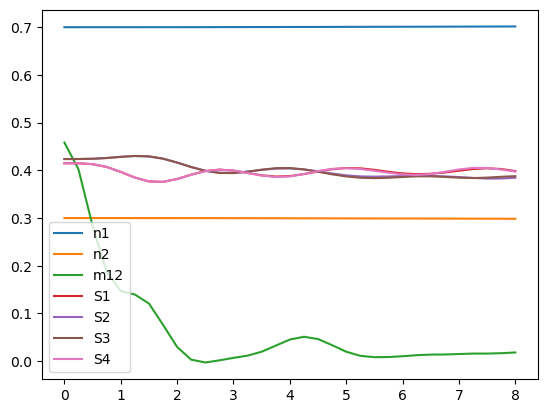

In [43]:
for k, v in traces.items():
    plt.plot(ts, v, label=k)
plt.legend()

In [32]:
H2, s2i, i2s = Hamiltonian_dpt_4U_position(NW, 0, 0, [0, 0], vS, U)
dt = 0.125
times = np.linspace(8, 16, 33)
for step in mps.tdvp_(psi, H2, times, method='2site', dt=dt, opts_svd=opts_svd, yield_initial=True):
    print(step)
    ts.append(step.tf)
    traces['n1'].append(mps.measure_1site(psi, dn1, psi, sites=sd).real)
    traces['n2'].append(mps.measure_1site(psi, dn2, psi, sites=sd).real)
    traces['m12'].append(mps.measure_1site(psi, m12, psi, sites=sd).real)
    for ind in ['S1', 'S2', 'S3', 'S4']:
        traces[ind].append(mps.measure_1site(psi, qn, psi, sites=s2i[ind]).real)


TDVP_out(ti=8.0, tf=8.0, time_independent=True, dt=0.125, steps=0)
TDVP_out(ti=8.0, tf=8.25, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=8.25, tf=8.5, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=8.5, tf=8.75, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=8.75, tf=9.0, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=9.0, tf=9.25, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=9.25, tf=9.5, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=9.5, tf=9.75, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=9.75, tf=10.0, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=10.0, tf=10.25, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=10.25, tf=10.5, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=10.5, tf=10.75, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=10.75, tf=11.0, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=11.0, tf=11.25, time_independent=True, dt=0.125, steps=2)
TDVP_out(ti=11.25, tf=11.5, time_indep

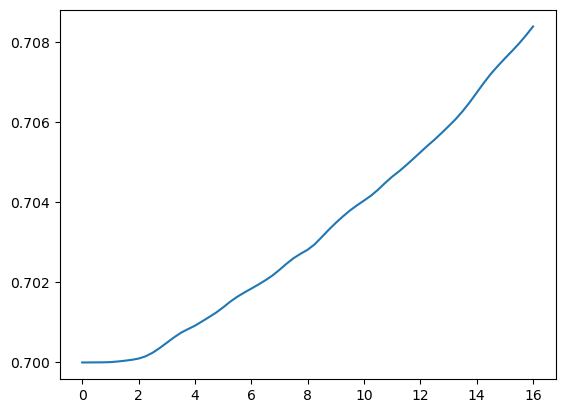

In [ ]:
tt = list(np.linspace(0, 8, 33)) + list(np.linspace(8, 16, 33))
plt.plot(tt, trace_n1)

In [2]:
NW = 8
D = 32
U = 3.05
vS = 0.125
alpha = 0.7
H0, s2i, i2s = Hamiltonian_dpt_4U_mixed(NW, 0, 0, [-1000, 0], 0, U)
qI, qc, qcp, qn, dx, dn1, dn2, dI, m12, m21 = local_operators(sym='U1')
psi = mps.random_mps(H0, n=NW+2)
opts_svd={"D_total": D}
info = mps.dmrg_(psi, H0, method='2site', opts_svd=opts_svd, max_sweeps=32)
print(info)

O = (np.sqrt(alpha) * dI + np.sqrt(1 - alpha) * m12) @ dn1
O = mps.product_mpo([O] + (len(H0) - 1) * [qI])
psi = O @ psi
psi.canonize_(to='last')
psi.canonize_(to='first')
print(mps.measure_1site(psi, dn1, psi, sites=0))
print(mps.measure_1site(psi, dn2, psi, sites=0))
oo = mps.measure_1site(psi, qn, psi, sites=list(range(1, len(H0) + 1)))


DMRG_out(sweeps=32, method='2site', energy=-1014.7356085327224, denergy=1.340367816737853e-10, max_dSchmidt=None, max_discarded_weight=0.0009125218655713565)
0.7000000000000005
0.3000000000000001


In [3]:
H1, s2i, i2s = Hamiltonian_dpt_4U_mixed(NW, 0, 0, [0, 0], 0, U)
dt = 0.25
times = np.linspace(0, 8, 33)
trace_n12 = []
for step in mps.tdvp_(psi, H1, times, method='2site', dt=dt, opts_svd=opts_svd, yield_initial=True):
    print(step)
    trace_n12.append(mps.measure_1site(psi, dn1, psi, sites=0).real)

H2, s2i, i2s = Hamiltonian_dpt_4U_mixed(NW, 0, 0, [0, 0], vS, U)
dt = 0.25
times = np.linspace(8, 16, 33)
for step in mps.tdvp_(psi, H1, times, method='2site', dt=dt, opts_svd=opts_svd, yield_initial=True):
    print(step)
    trace_n12.append(mps.measure_1site(psi, dn1, psi, sites=0).real)


TDVP_out(ti=0.0, tf=0.0, time_independent=True, dt=0.25, steps=0)
TDVP_out(ti=0.0, tf=0.25, time_independent=True, dt=0.25, steps=1)
TDVP_out(ti=0.25, tf=0.5, time_independent=True, dt=0.25, steps=1)
TDVP_out(ti=0.5, tf=0.75, time_independent=True, dt=0.25, steps=1)
TDVP_out(ti=0.75, tf=1.0, time_independent=True, dt=0.25, steps=1)
TDVP_out(ti=1.0, tf=1.25, time_independent=True, dt=0.25, steps=1)
TDVP_out(ti=1.25, tf=1.5, time_independent=True, dt=0.25, steps=1)
TDVP_out(ti=1.5, tf=1.75, time_independent=True, dt=0.25, steps=1)
TDVP_out(ti=1.75, tf=2.0, time_independent=True, dt=0.25, steps=1)
TDVP_out(ti=2.0, tf=2.25, time_independent=True, dt=0.25, steps=1)
TDVP_out(ti=2.25, tf=2.5, time_independent=True, dt=0.25, steps=1)
TDVP_out(ti=2.5, tf=2.75, time_independent=True, dt=0.25, steps=1)
TDVP_out(ti=2.75, tf=3.0, time_independent=True, dt=0.25, steps=1)
TDVP_out(ti=3.0, tf=3.25, time_independent=True, dt=0.25, steps=1)
TDVP_out(ti=3.25, tf=3.5, time_independent=True, dt=0.25, steps

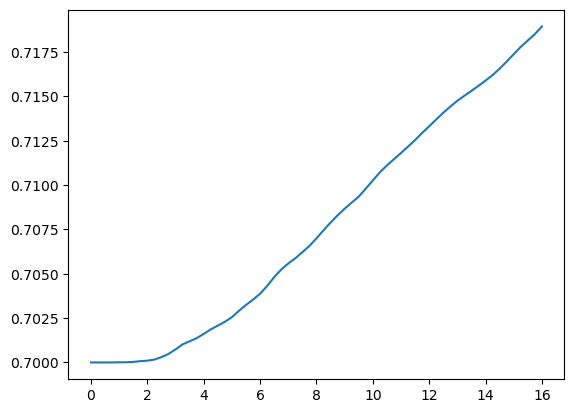

In [4]:
tt = list(np.linspace(0, 8, 33)) + list(np.linspace(8, 16, 33))
plt.plot(tt, trace_n12)